In [53]:
# Standard imports
import numpy as np
import pandas as pd

#
import random

# To interact with the operating system
import os

# For statistical modeling
import scipy.stats as stats

# To acquire MYSQL Data
import acquire
from env import username, password, host
import wrangle

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import evaluate

# For running modeling
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

### By the end of this exercise you will also create an evaluate.py, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

#### 1. Load your zillow dataset.

In [2]:
train = pd.read_csv('sfh_zillow_train.csv', index_col=0)

In [3]:
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0


baseline = df.y.mean()

df['baseline'] = baseline

lm = LinearRegression()

lm.fit(df[['x']], df.y)

df['yhat'] = lm.predict(df[['x']])

df['baseline_residual'] = df.y - df.baseline

df['residual'] = df.y - df.yhat

df['baseline_residual_sq'] = df.baseline_residual**2

df['residual_sq'] = df.residual**2

SSE_baseline = df.baseline_residual_sq.sum()

SSE = df.residual_sq.sum()

MSE_baseline = SSE_baseline/len(df)

MSE = SSE/len(df)

RMSE_baseline = MSE_baseline**0.5

RMSE = MSE**0.5

MSE2_baseline = mean_squared_error(df.y, df.baseline)

MSE2 = mean_squared_error(df.y, df.yhat)

SSE2_baseline = MSE2_baseline * len(df)

SSE2 = MSE2 * len(df)

RMSE2_baseline = MSE2_baseline**0.5

RMSE2 = MSE2**0.5

#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

**Modify and add to the code above as necessary for it to work with the zillow dataset.**

In [6]:
from sklearn.linear_model import LinearRegression

X = train['f_sqft']
y = train['tax_value']

model = LinearRegression().fit(train[['f_sqft']], y)
predictions = model.predict(train[['f_sqft']])

In [7]:
predictions

array([445374.75467606, 267225.19903235, 327255.47679326, ...,
       310082.63614027, 401920.00137152, 286488.64637354])

In [8]:
X

1297002    2441.0
2422146    1248.0
2656567    1650.0
2177611    1601.0
1108712    1100.0
            ...  
2138425    1438.0
188836     1755.0
1787453    1535.0
2038665    2150.0
1947274    1377.0
Name: f_sqft, Length: 1114251, dtype: float64

#### 3. Plot the residuals for the linear regression model that you made.

In [11]:
train.tax_value.mean()

327823.3393104426

In [12]:
train['yhat'] = predictions
train['baseline'] = train.tax_value.mean()

In [13]:
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips,yhat,baseline
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0,445374.754676,327823.33931
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0,267225.199032,327823.33931
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0,327255.476793,327823.33931


In [14]:
train['baseline_residual'] = y - train.baseline

In [15]:
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips,yhat,baseline,baseline_residual
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0,445374.754676,327823.33931,-153364.33931
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0,267225.199032,327823.33931,-91748.33931
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0,327255.476793,327823.33931,-203496.33931


In [16]:
train['residual'] = y - train.yhat

train['baseline_residual_sq'] = train.baseline_residual**2

train['residual_sq'] = train.residual**2

In [17]:
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips,yhat,baseline,baseline_residual,residual,baseline_residual_sq,residual_sq
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0,445374.754676,327823.33931,-153364.33931,-270915.754676,2.352062e+10,7.339535e+10
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0,267225.199032,327823.33931,-91748.33931,-31150.199032,8.417758e+09,9.703349e+08
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0,327255.476793,327823.33931,-203496.33931,-202928.476793,4.141076e+10,4.117997e+10


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1114251.0,3.214398e+00,7.817534e-01,2.000000,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
bathrooms,1114251.0,2.053116e+00,7.076468e-01,1.000000,2.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00
f_sqft,1114251.0,1.653803e+03,5.648836e+02,1.000000,1.231000e+03,1.548000e+03,1.988000e+03,3.408000e+03
tax_value,1114251.0,3.278233e+05,1.991043e+05,1.000000,1.734140e+05,2.964970e+05,4.525170e+05,9.509400e+05
yearbuilt,1114251.0,1.959444e+03,2.055092e+01,1801.000000,1.949000e+03,1.957000e+03,1.972000e+03,2.016000e+03
taxamount,1114251.0,4.068834e+03,2.241650e+03,20.240000,2.367270e+03,3.750630e+03,5.487355e+03,1.036889e+04
fips,1114251.0,6.048335e+03,2.052844e+01,6037.000000,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
yhat,1114251.0,3.278233e+05,8.435353e+04,81011.874734,2.646866e+05,3.120239e+05,3.777287e+05,5.897759e+05
baseline,1114251.0,3.278233e+05,1.235866e-06,327823.339310,3.278233e+05,3.278233e+05,3.278233e+05,3.278233e+05
baseline_residual,1114251.0,7.121912e-10,1.991043e+05,-327822.339310,-1.544093e+05,-3.132634e+04,1.246937e+05,6.231167e+05


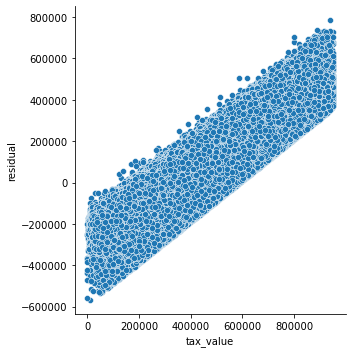

In [20]:
sns.relplot(train.tax_value, train.residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

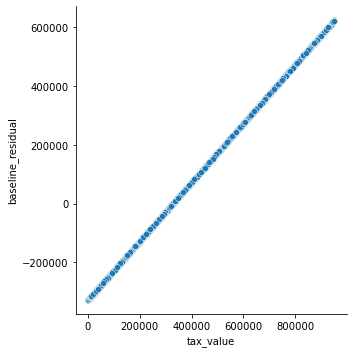

In [21]:
sns.relplot(train.tax_value, train.baseline_residual)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

#### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [25]:
SSE = train.residual_sq.sum()
MSE = SSE/len(train)
RMSE = MSE**0.5
MSE2 = mean_squared_error(train.tax_value, train.yhat)
SSE2 = MSE2 * len(train)
RMSE2 = MSE2**0.5

In [30]:
print(f'SSE: {SSE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MSE2: {MSE2}')
print(f'SSE2: {SSE2}')
print(f'RMSE2: {RMSE2}')

SSE: 3.6243210250115016e+16
MSE: 32526971257.02828
RMSE: 180352.35306762226
MSE2: 32526971257.02828
SSE2: 3.6243210250115016e+16
RMSE2: 180352.35306762226


In [44]:
ESS = sum((train.yhat - train.tax_value.mean())**2)
TSS = ESS + SSE
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')

ESS: 7928466475211477.0
TSS: 4.41716767253265e+16


In [46]:
R2 = ESS/TSS
R2

0.17949208775825282

#### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [26]:
SSE_baseline = train.baseline_residual_sq.sum()
MSE_baseline = SSE_baseline/len(train)
RMSE_baseline = MSE_baseline**0.5
MSE2_baseline = mean_squared_error(train.tax_value, train.baseline)
SSE2_baseline = MSE2_baseline * len(train)
RMSE2_baseline = MSE2_baseline**0.5

In [29]:
print(f'Baseline SSE: {SSE_baseline}')
print(f'Baseline MSE: {MSE_baseline}')
print(f'Baseline RMSE: {RMSE_baseline}')
print(f'Baseline MSE2: {MSE2_baseline}')
print(f'Baseline SSE2: {SSE2_baseline}')
print(f'Baseline RMSE2: {RMSE2_baseline}')

Baseline SSE: 4.4171676725328184e+16
Baseline MSE: 39642483359.07097
Baseline RMSE: 199104.2022637166
Baseline MSE2: 39642483359.07097
Baseline SSE2: 4.4171676725328184e+16
Baseline RMSE2: 199104.2022637166


In [45]:
ESS_baseline = sum((train.baseline - train.tax_value.mean())**2)
TSS_baseline = ESS_baseline + SSE_baseline
R2_baseline = ESS_baseline/TSS_baseline
print(f'Baseline ESS: {ESS_baseline}')
print(f'Baseline TSS: {TSS_baseline}')
print(f'Baseline R2: {R2_baseline}')

Baseline ESS: 0.0
Baseline TSS: 4.4171676725328184e+16
Baseline R2: 0.0


#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

#### 7. What is the amount of variance explained in your model?

In [24]:
r2_score(train.tax_value, train.yhat)

0.1794920877582843

In [31]:
r2_score(train.tax_value, train.baseline)

0.0

#### 8. Is your model better than the baseline model?

The model is better than the baseline

#### 9. Create a file named evaluate.py that contains the following functions:

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## Bonus Exercises
#### 1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

#### 2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

---

In [55]:
train.fips.value_counts()

6037.0    745857
6059.0    281371
6111.0     87023
Name: fips, dtype: int64

Counties<br>
06037	Los Angeles<br>
06059	Orange<br>
06111	Ventura